## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Mon Mar  4 15:05:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.3/201.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TEslPplRDxMYNSvdGgkj")
project = rf.workspace("eric-z0ptd").project("strawberry_picking_2")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing in

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Strawberry_Picking_2-1 in yolov8:: 100%|██████████| 8900/8900 [00:01<00:00, 6240.28it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 387MB/s]
New https://pypi.org/project/ultralytics/8.1.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Strawberry_Picking_2-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, 

In [ ]:
%cd /content
!zip -r runs.zip runs/

In [ ]:
from google.colab import files
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1709564796.6f6d4e84e57f.1861.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3645.jpg  weights
P_curve.png					    train_batch3646.jpg
PR_curve.png					    train_batch3647.jpg


/content


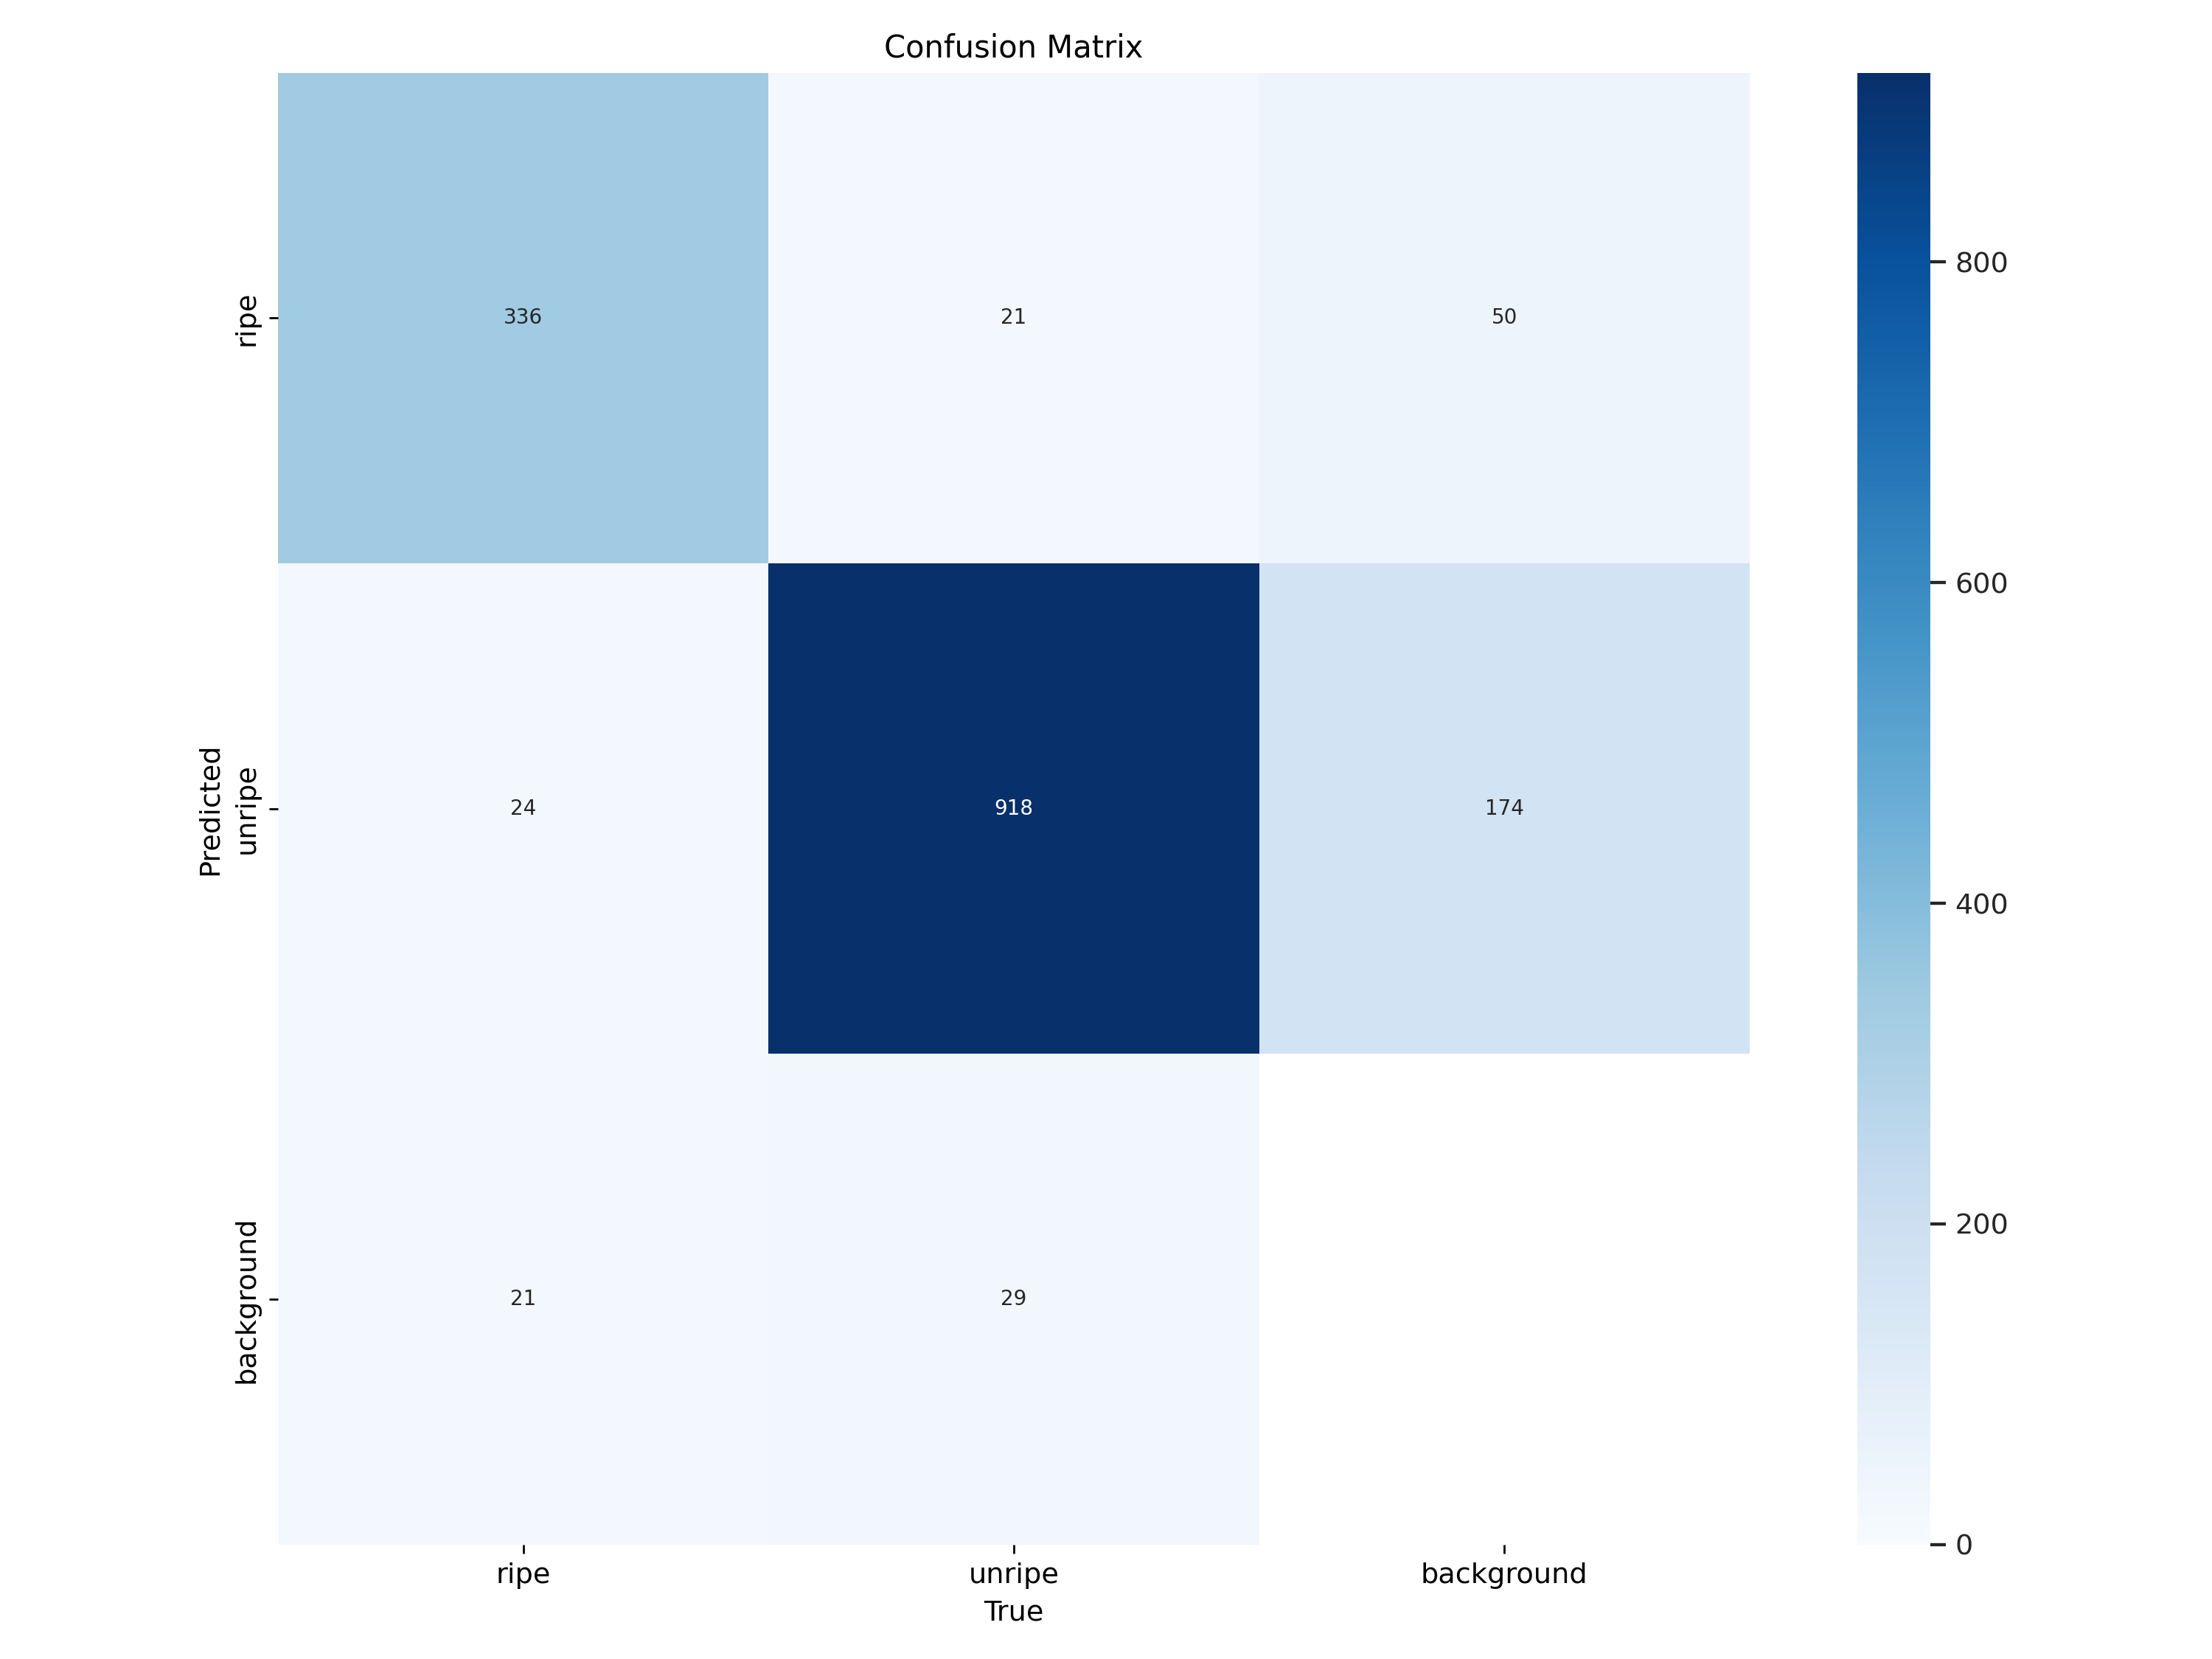

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


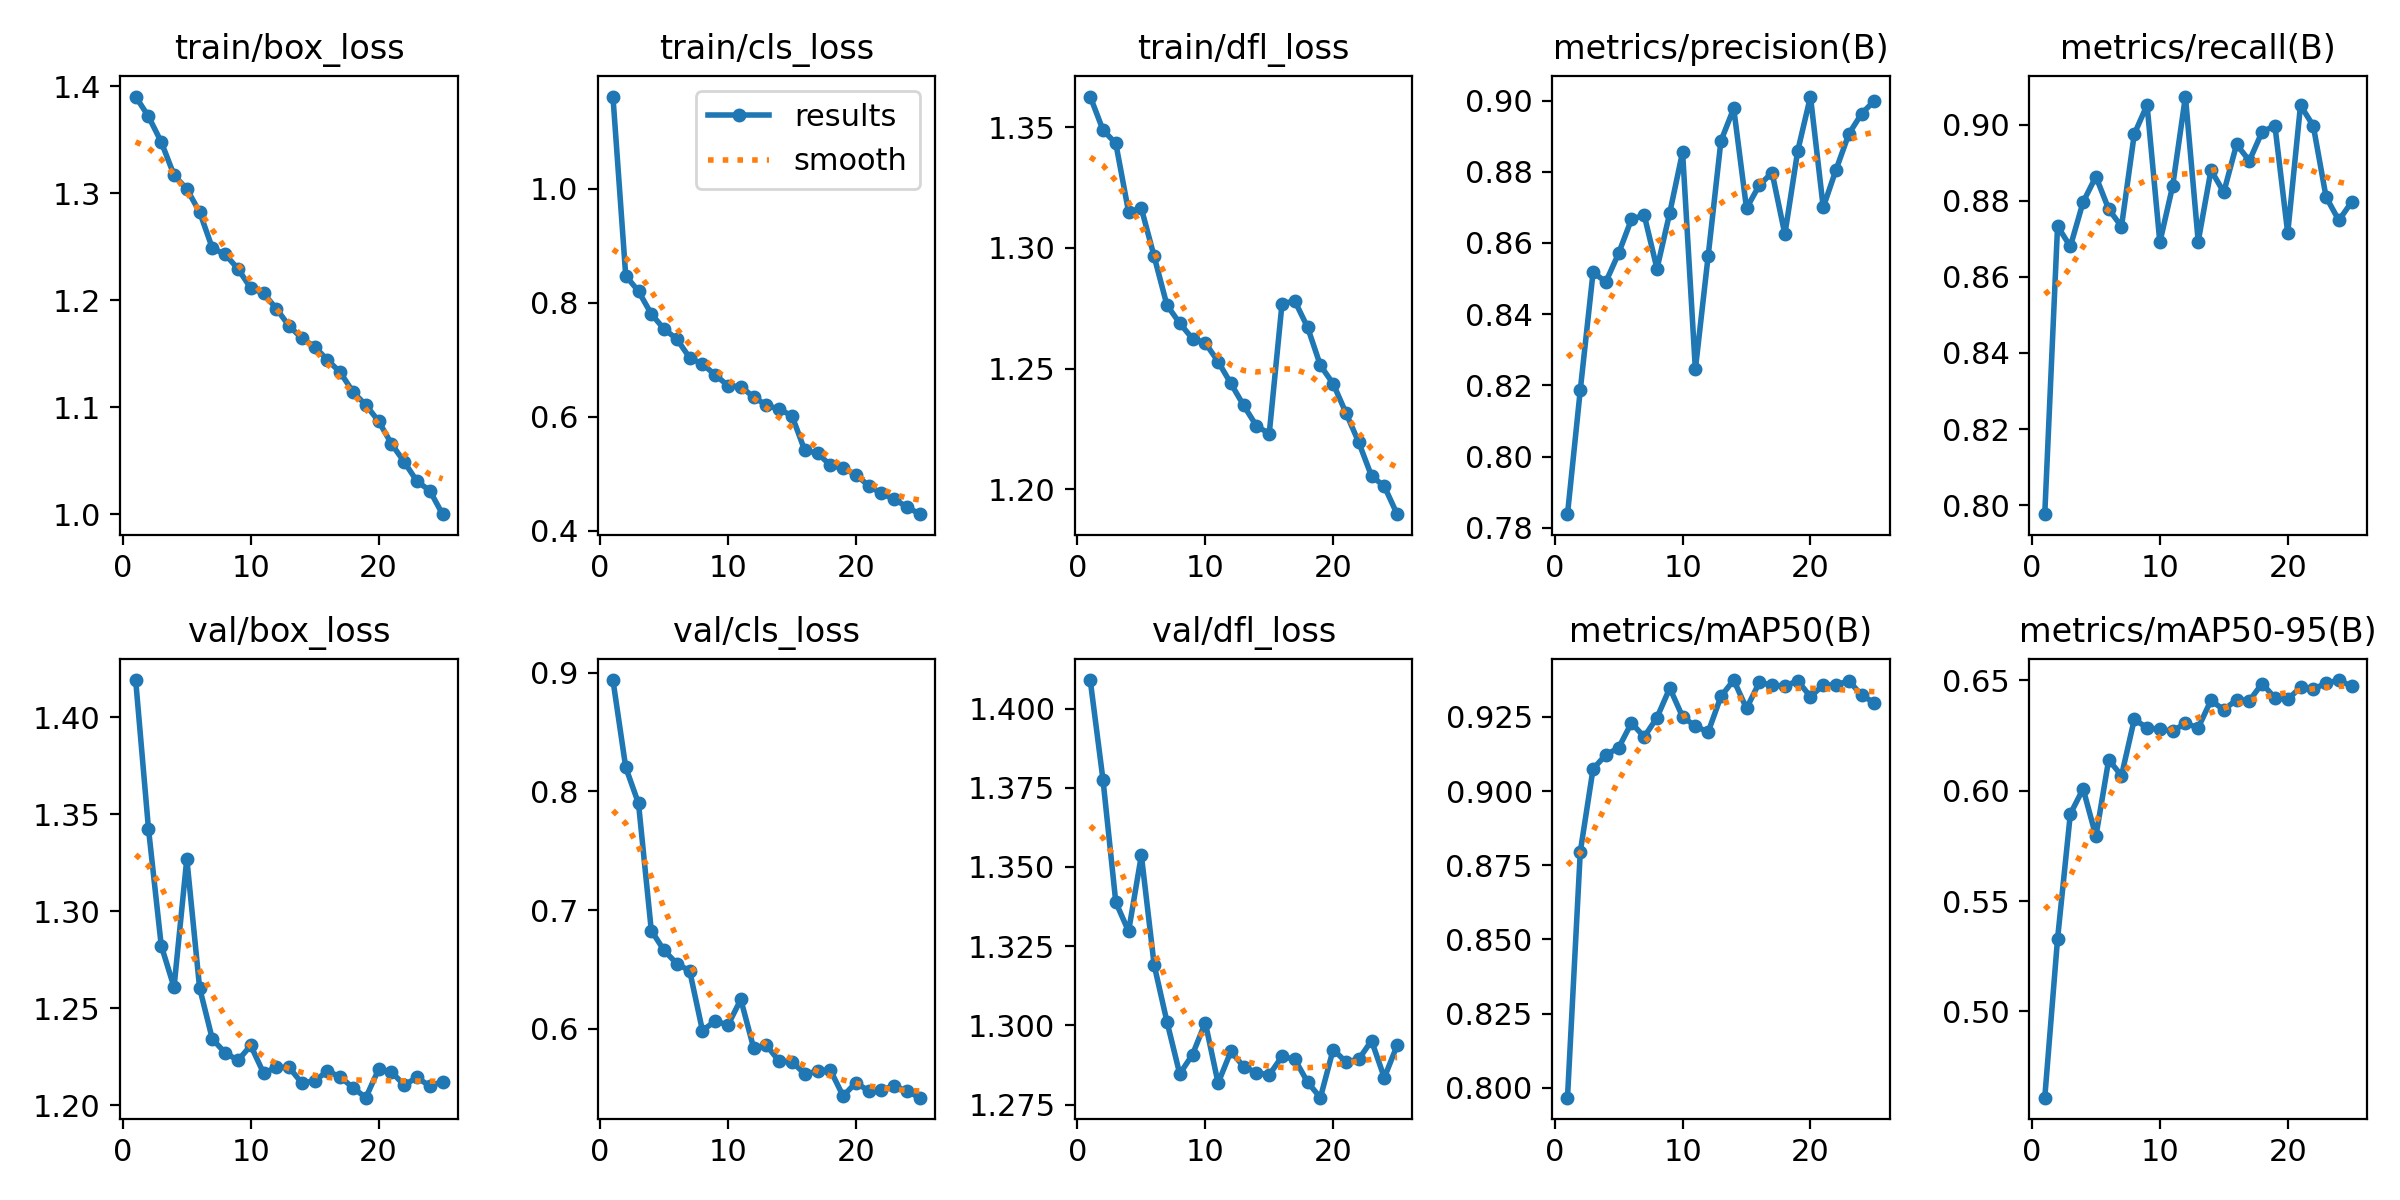

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


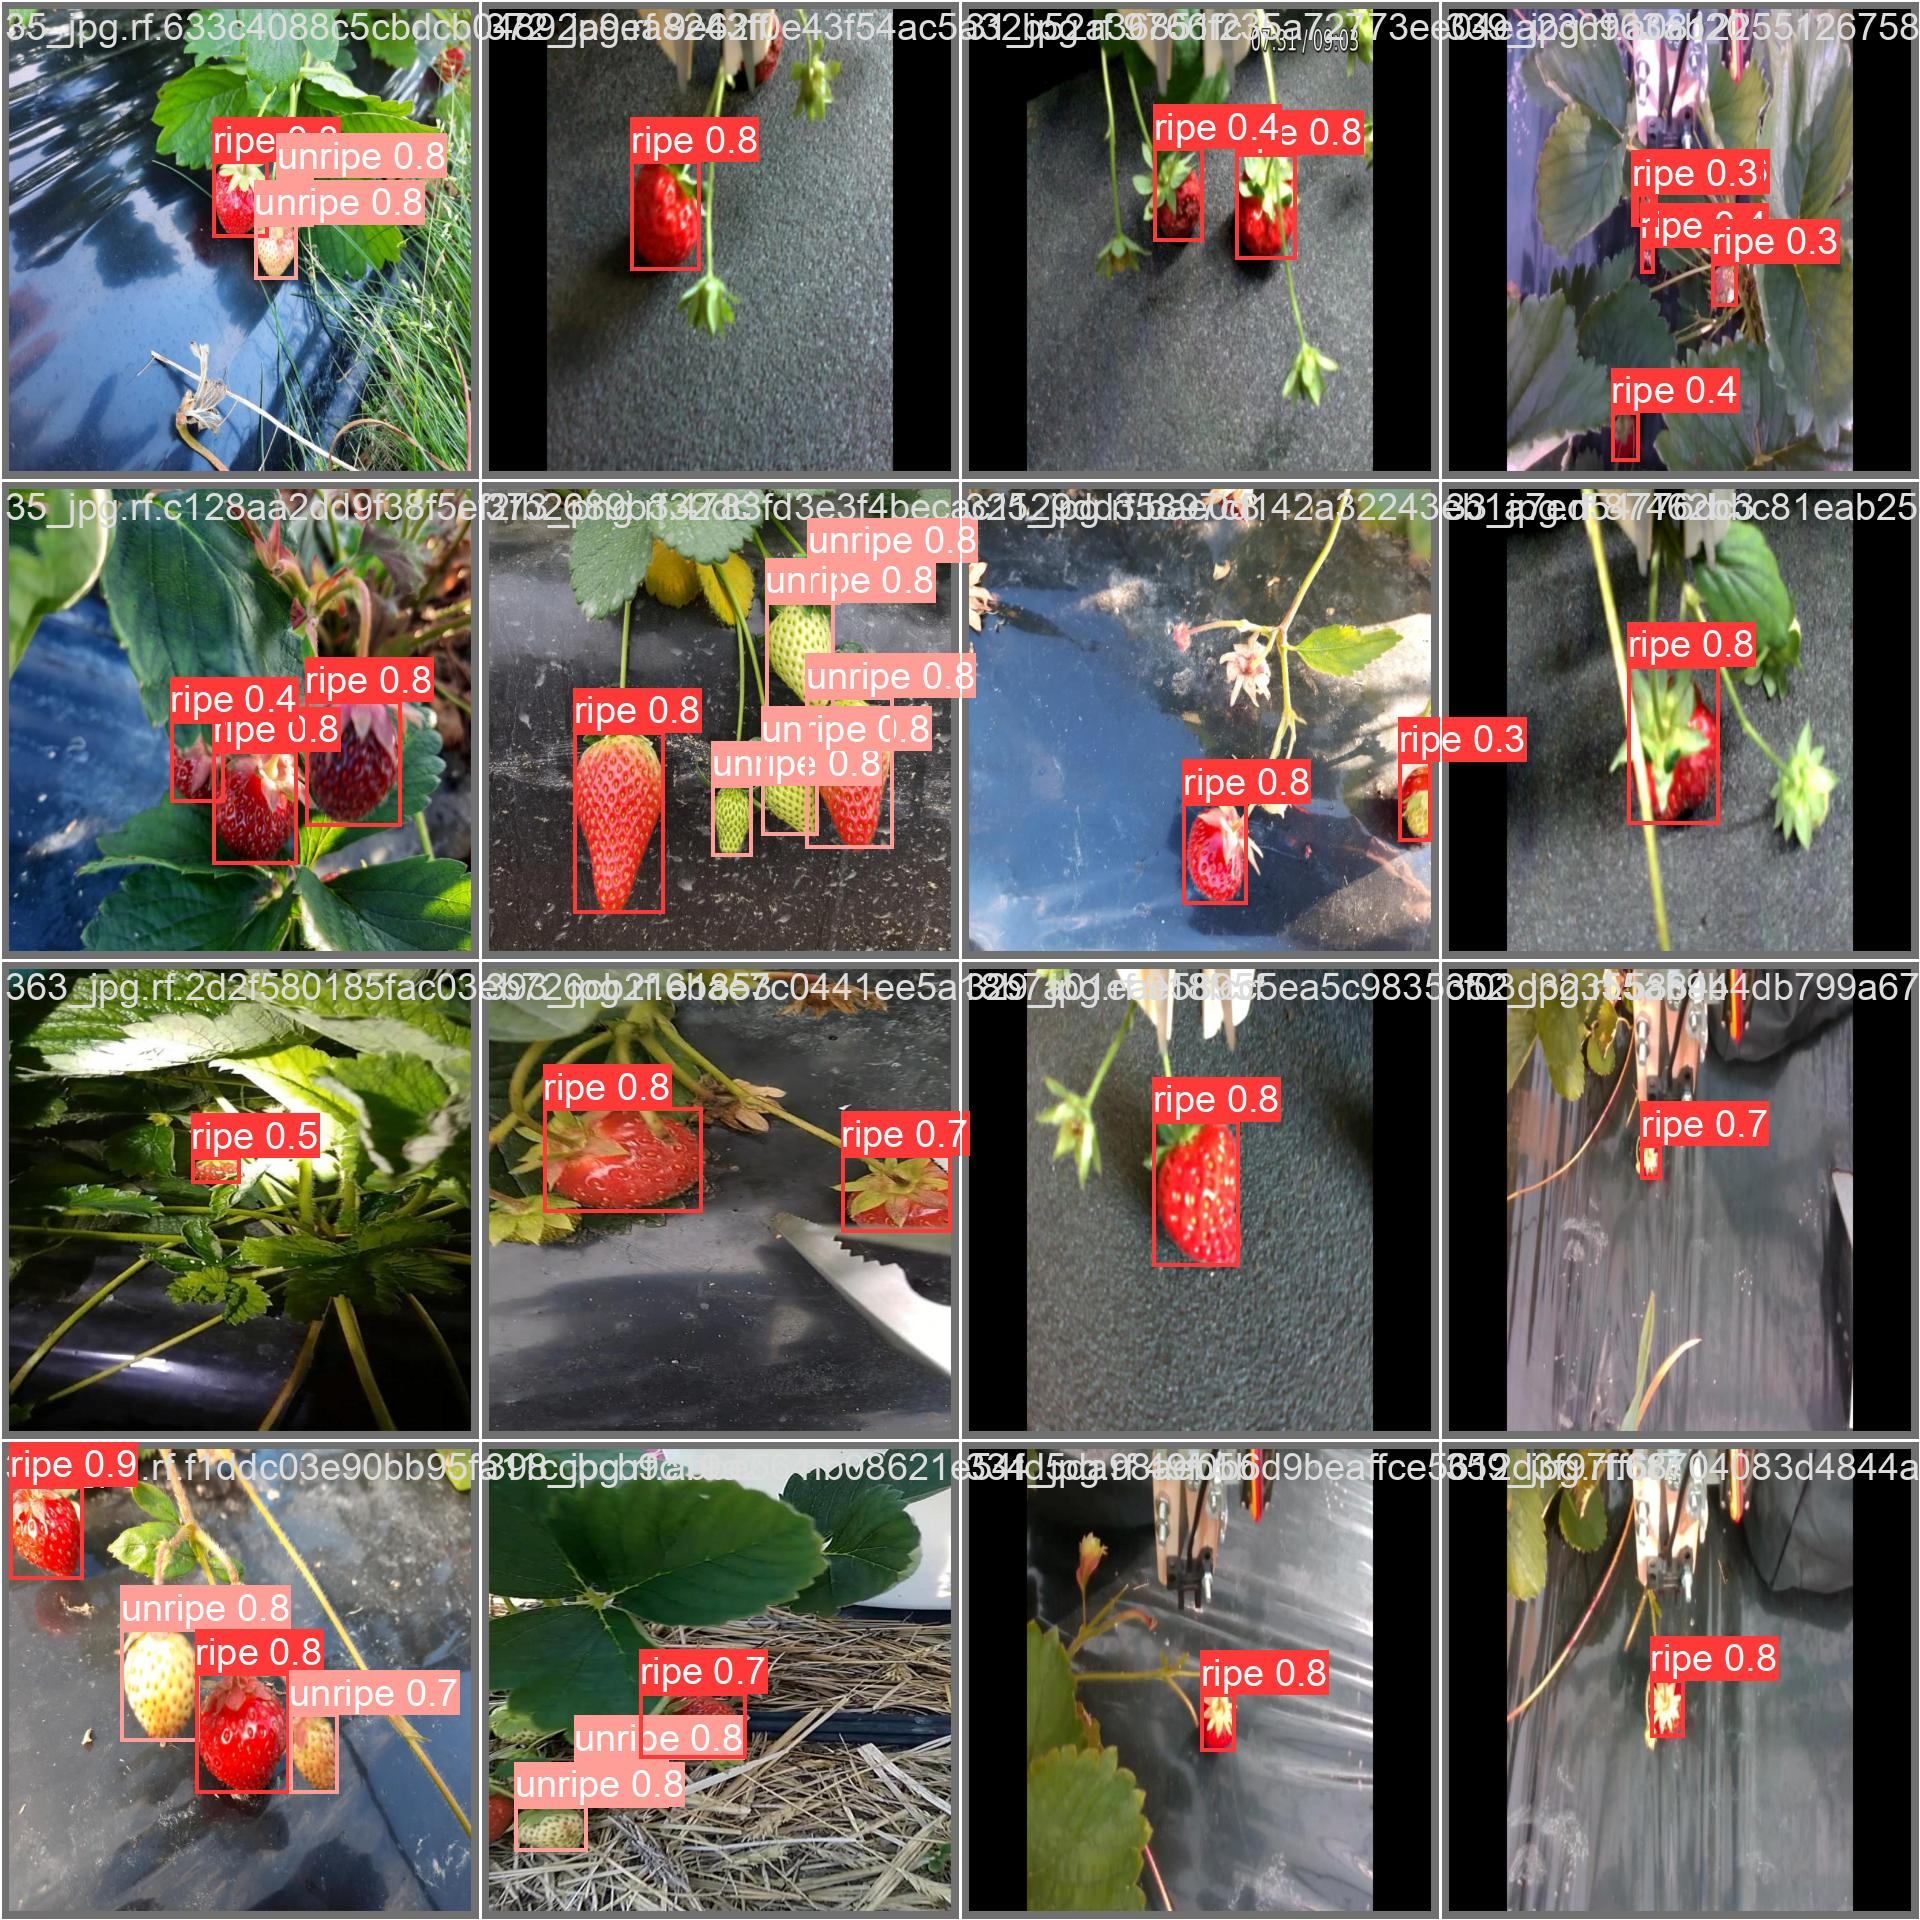

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Strawberry_Picking_2-1/valid/labels.cache... 371 images, 2 backgrounds, 0 corrupt: 100% 371/371 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 24/24 [00:10<00:00,  2.29it/s]
                   all        371       1349      0.896      0.875      0.932       0.65
                  ripe        371        381      0.887      0.837      0.908      0.666
                unripe        371        968      0.906      0.912      0.956      0.635
Speed: 1.1ms preprocess, 13.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/185 /content/datasets/Strawberry_Picking_2-1/test/images/101_jpg.rf.1831b73d4fdd68887e51f999e8d41075.jpg: 800x800 4 ripes, 22.5ms
image 2/185 /content/datasets/Strawberry_Picking_2-1/test/images/106_jpg.rf.0624017417e9518d82b402923593c6e0.jpg: 800x800 1 ripe, 22.5ms
image 3/185 /content/datasets/Strawberry_Picking_2-1/test/images/1080_png.rf.9fc05092fa6417f70b9e4e6cc414b665.jpg: 800x800 1 ripe, 22.5ms
image 4/185 /content/datasets/Strawberry_Picking_2-1/test/images/10_jpg.rf.a3184e9003d2118dc8c88da4b72e39ef.jpg: 800x800 4 ripes, 1 unripe, 22.5ms
image 5/185 /content/datasets/Strawberry_Picking_2-1/test/images/110_jpg.rf.abac2918f1053671bb5133719dfbc1fe.jpg: 800x800 3 ripes, 2 unripes, 22.5ms
image 6/185 /content/datasets/Strawberry_Picking_2-1/test/images/1112_png.rf.e4cfd1ec418f83af2f1e4cb34243e0f7.jp

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 1295_png.rf.8ad0f93937f119c562c55b94d3073d91.jpg


{'predictions': [{'x': 434.0,
   'y': 254.0,
   'width': 108.0,
   'height': 194.0,
   'confidence': 0.8772352933883667,
   'class': 'ripe',
   'class_id': 0,
   'detection_id': '61242673-3b42-4a4c-95a0-7d727d64d850',
   'image_path': '/content/datasets/Strawberry_Picking_2-1/test/images/1295_png.rf.8ad0f93937f119c562c55b94d3073d91.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 339.0,
   'y': 115.5,
   'width': 100.0,
   'height': 203.0,
   'confidence': 0.8767911791801453,
   'class': 'ripe',
   'class_id': 0,
   'detection_id': 'f2d3735d-1a9f-485b-b335-a438d59e115e',
   'image_path': '/content/datasets/Strawberry_Picking_2-1/test/images/1295_png.rf.8ad0f93937f119c562c55b94d3073d91.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 349.0,
   'y': 295.0,
   'width': 76.0,
   'height': 142.0,
   'confidence': 0.8329658508300781,
   'class': 'unripe',
   'class_id': 1,
   'detection_id': 'b3bd1b85-87cf-480b-8215-c6351ca980cf',
   'image_path': '/content/datasets/S

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('runs/detect/train/weights/best.pt')  # load a custom trained model

# Export the model
model.export(format='onnx')


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 6, 13125) (21.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 246.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.5s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 8.6s, saved as 'runs/detect/train/weights/best.onnx' (42.7 MB)

Export complete (10.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=800  
Validate:        yolo val task=detect model=runs/

'runs/detect/train/weights/best.onnx'

In [ ]:
%cd /content
!zip -r runs.zip runs/

/content
updating: runs/ (stored 0%)
updating: runs/detect/ (stored 0%)
updating: runs/detect/train/ (stored 0%)
updating: runs/detect/train/train_batch2.jpg (deflated 1%)
updating: runs/detect/train/train_batch3646.jpg (deflated 3%)
updating: runs/detect/train/args.yaml (deflated 51%)
updating: runs/detect/train/val_batch1_pred.jpg (deflated 5%)
updating: runs/detect/train/R_curve.png (deflated 14%)
updating: runs/detect/train/labels_correlogram.jpg (deflated 33%)
updating: runs/detect/train/PR_curve.png (deflated 16%)
updating: runs/detect/train/train_batch1.jpg (deflated 1%)
updating: runs/detect/train/confusion_matrix_normalized.png (deflated 33%)
updating: runs/detect/train/train_batch3645.jpg (deflated 4%)
updating: runs/detect/train/weights/ (stored 0%)
updating: runs/detect/train/weights/last.pt (deflated 8%)
updating: runs/detect/train/weights/best.pt (deflated 8%)
updating: runs/detect/train/labels.jpg (deflated 28%)
updating: runs/detect/train/val_batch1_labels.jpg (deflated

In [ ]:
from google.colab import files
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>